1/1 [==============================] - 0s 27ms/step
tf.Tensor([[0.53952116 0.46047887]], shape=(1, 2), dtype=float32)
1/1 [==============================] - 0s 23ms/step
tf.Tensor([[0.41633883 0.58366114]], shape=(1, 2), dtype=float32)
1/1 [==============================] - 0s 25ms/step
tf.Tensor([[0.03573955 0.96426046]], shape=(1, 2), dtype=float32)
1/1 [==============================] - 0s 24ms/step
tf.Tensor([[0.2246164  0.77538365]], shape=(1, 2), dtype=float32)


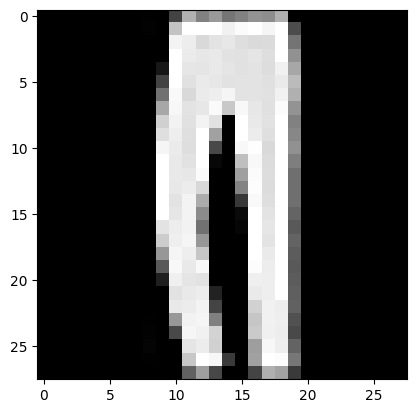

In [25]:
import numpy as np
import tensorflow as tf;
import matplotlib.pyplot as plt
(cp_x, cp_y2), (cp_x, cp_y), (new_x, new_y), (tst_x, tst_y)=np.load('datasets/fmnist/clipbkd-new-1.npy', allow_pickle=True)
model = tf.keras.models.load_model('test/fmnist_2f/fmnist_2f-1-1-0-1-49.h5',compile=False)

logits = model.predict(new_x.reshape((-1, 28, 28, 1)))

print(tf.nn.softmax(logits))
model = tf.keras.models.load_model(
    'test/fmnist_2f/fmnist_2f-2-1-0-1-49.h5', compile=False)

logits = model.predict(new_x.reshape((-1, 28, 28, 1)))

print(tf.nn.softmax(logits))

model = tf.keras.models.load_model(
    'test/fmnist_2f/fmnist_2f-4-1-0-1-20.h5', compile=False)

logits = model.predict(new_x.reshape((-1, 28, 28, 1)))

print(tf.nn.softmax(logits))

model = tf.keras.models.load_model(
    'test/fmnist_2f/fmnist_2f-8-1-0-1-49.h5', compile=False)

logits = model.predict(new_x.reshape((-1, 28, 28, 1)))

print(tf.nn.softmax(logits))

plt.imshow(tst_x[0], cmap='gray')

plt.show()


In [32]:
def test(n_poi):
    model_name = 'test/fmnist_2f/fmnist_2f-{}-1-0-1-{}.h5'
    all = []
    for i in range(0,50):
        model = tf.keras.models.load_model(
            model_name.format(n_poi,i), compile=False)
        logits = model.predict(new_x.reshape((-1, 28, 28, 1)))
        all.append(tf.nn.softmax(logits))


    # Stack the tensors along a new dimension
    stacked_tensors = tf.stack(all, axis=0)

    # Add tensors element-wise by summing along the new dimension
    return tf.reduce_sum(stacked_tensors, axis=0) / len(all)


print([test(i) for i in [1,2,4,8]])


1/1 [==============================] - 0s 24ms/step
[<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.56218344, 0.43781653]], dtype=float32)>, <tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.41276437, 0.5872357 ]], dtype=float32)>, <tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.30690438, 0.6930957 ]], dtype=float32)>, <tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.19049759, 0.80950224]], dtype=float32)>]


In [ ]:
import tensorflow_privacy


def getModel():
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(32, activation='relu',
                                kernel_initializer='glorot_normal'),
        tf.keras.layers.Dense(2, kernel_initializer='glorot_normal')
    ])


    optimizer = tensorflow_privacy.VectorizedDPKerasSGDOptimizer(
        l2_norm_clip=1,
        noise_multiplier=0,
        num_microbatches=250,
        learning_rate=0.15)

    loss = tf.keras.losses.CategoricalCrossentropy(
        from_logits=True, reduction=tf.losses.Reduction.NONE)
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

    (cp_x, cp_y2), (cp_x, cp_y), (new_x, new_y), (tst_x, tst_y) = np.load(
        'datasets/fmnist/clipbkd-new-1.npy', allow_pickle=True)
    model.fit(cp_x, cp_y,
            epochs=24,
            validation_data=(tst_x, tst_y),
            batch_size=250)



def test(n_poi):
    model_name = 'test/fmnist_2f/fmnist_2f-{}-1-0-1-{}.h5'
    all = []
    for i in range(0, 50):
        model = tf.keras.models.load_model(
            model_name.format(n_poi, i), compile=False)
        logits = model.predict(new_x.reshape((-1, 28, 28, 1)))
        all.append(tf.nn.softmax(logits))

    # Stack the tensors along a new dimension
    stacked_tensors = tf.stack(all, axis=0)

    # Add tensors element-wise by summing along the new dimension
    return tf.reduce_sum(stacked_tensors, axis=0) / len(all)
